# Importing Data (manual data insertion into content folder) and pre-processing


In [0]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
sns.set(style='darkgrid')
# warnings.filterwarnings('ignore')
remove_ids = [1, 4, 11, 12, 18, 39, 49, 53]

pn = 53

In [0]:
df =  pd.read_csv("/content/results-survey128918.csv")
pf = pd.DataFrame(columns=["s0a","s0b","s1a","s1b","s2a","s2b","s3a","s3b","s4a","s4b"])

for i in remove_ids:
  df = df.drop(df[df["What is your participant number?"] == i].index)
df = df.reset_index()

In [0]:
df = df.drop(columns=['Response ID', 'Date submitted', 'Last page', 'Start language','Date last action'])
basics = df.loc[ : , ['What is your sex?','How old are you?']]
robot_interaction  = df.loc[ : , [
                      'How familiar are you with computers?', 
                      'Have you ever interacted with a robot before? [Never]',
                      'Have you ever interacted with a robot before? [In an entertainment setting (i.e. drones)]',
                      'Have you ever interacted with a robot before? [In a commercial/utility setting (i.e. vacuums, industry)]',
                      'Have you ever interacted with a robot before? [At work (i.e. robotics research)]',
                      'Do you like robots?'
                      ]
                  ]
bfis = df.loc[ : , [
                      'Do you agree or disagree with the following statements? [Do you worry a lot?]',
                      'Do you agree or disagree with the following statements? [Do you get nervous easily?]',
                      'Do you agree or disagree with the following statements? [Do you remain calm in tense situations?]',
                      'Do you agree or disagree with the following statements? [Are you talkative?]',
                      'Do you agree or disagree with the following statements? [Are you outgoing, sociable?]',
                      'Do you agree or disagree with the following statements? [Are you reserved?]',
                      'Do you agree or disagree with the following statements? [Are you original? / Do you come up with new ideas?]',
                      'Do you agree or disagree with the following statements? [Do you value artistic, aesthetic experiences?]',
                      'Do you agree or disagree with the following statements? [Do you have an active imagination?]',
                      'Do you agree or disagree with the following statements? [Are you sometimes rude to others?]',
                      'Do you agree or disagree with the following statements? [Do you have a forgiving nature?]',
                      'Do you agree or disagree with the following statements? [Are you considerate and kind to almost everyone?]',
                      'Do you agree or disagree with the following statements? [Do you do a thorough job?]',
                      'Do you agree or disagree with the following statements? [Do you tend to be lazy?]',
                      'Do you agree or disagree with the following statements? [Do you do things efficiently?]',
                      ]
                ]
risk_propensity = df.loc[ : , [
                      'Do you agree or disagree with the following statements? [Safety first]', 
                      'Do you agree or disagree with the following statements? [I do not take risks with my health]',
                      'Do you agree or disagree with the following statements? [I prefer to avoid risks]',
                      'Do you agree or disagree with the following statements? [I take risks regularly]',
                      'Do you agree or disagree with the following statements? [I really dislike not knowing what is going to happen]',
                      ]
                  ]
trust_propensity = df.loc[ : , [
                      'Do you agree or disagree with the following statements? [One should be very cautious with strangers.]',
                      'Do you agree or disagree with the following statements? [Most experts tell the truth about the limits of their knowledge.]',
                      'Do you agree or disagree with the following statements? [Most people can be counted on to do what they say they will do.]',
                      'Do you agree or disagree with the following statements? [Most people answer public opinion polls honestly.]',
                      ]
                  ]

ownQ = df.iloc[:,76:110]
ownQ["id"] = df["What is your participant number?"]

In [0]:
ownQ.replace(to_replace="A1", value=1, inplace=True)
ownQ.replace(to_replace="A2", value=2, inplace=True)
ownQ.replace(to_replace="A3", value=3, inplace=True)
ownQ.replace(to_replace="A4", value=4, inplace=True)
ownQ.replace(to_replace="A5", value=5, inplace=True)
ownQ.replace(to_replace="A6", value=6, inplace=True)
ownQ.replace(to_replace="A7", value=7, inplace=True)
ownQ.replace(to_replace="A8", value=8, inplace=True)
ownQ.replace(to_replace="A9", value=9, inplace=True)
ownQ.replace(to_replace="A02", value=1, inplace=True)
ownQ.replace(to_replace="A03", value=2, inplace=True)
ownQ.replace(to_replace="A04", value=3, inplace=True)
ownQ.replace(to_replace="A05", value=4, inplace=True)
ownQ.replace(to_replace="A06", value=5, inplace=True)
ownQ.replace(to_replace="A07", value=6, inplace=True)
ownQ.replace(to_replace="A08", value=7, inplace=True)
ownQ.replace(to_replace="A09", value=8, inplace=True)
ownQ.replace(to_replace="A10", value=9, inplace=True)

ownQ["A_conte"] = (ownQ.iloc[:,0] + ownQ.iloc[:,2] + ownQ.iloc[:,6] + ownQ.iloc[:,7]) / 4
ownQ["A_speec"] = (ownQ.iloc[:,3] + ownQ.iloc[:,9] + ownQ.iloc[:,10]) / 3
ownQ["A_coope"] = (ownQ.iloc[:,4] + ownQ.iloc[:,11] ) / 2
ownQ["A_socia"] = (ownQ.iloc[:,1] + ownQ.iloc[:,5] + ownQ.iloc[:,8] + ownQ.iloc[:,12]) / 4

ownQ["A_conte"] = ownQ["A_conte"] / 9
ownQ["A_speec"] = ownQ["A_speec"] / 9
ownQ["A_coope"] = ownQ["A_coope"] / 9
ownQ["A_socia"] = ownQ["A_socia"] / 9

ownQ["B_conte"] = (ownQ.iloc[:,13] + ownQ.iloc[:,15] + ownQ.iloc[:,19] + ownQ.iloc[:,20]) / 4
ownQ["B_speec"] = (ownQ.iloc[:,16] + ownQ.iloc[:,22] + ownQ.iloc[:,23]) / 3
ownQ["B_coope"] = (ownQ.iloc[:,17] + ownQ.iloc[:,24] ) / 2
ownQ["B_socia"] = (ownQ.iloc[:,14] + ownQ.iloc[:,18] + ownQ.iloc[:,21] + ownQ.iloc[:,25]) / 4

ownQ["B_conte"] = ownQ["B_conte"] / 9
ownQ["B_speec"] = ownQ["B_speec"] / 9
ownQ["B_coope"] = ownQ["B_coope"] / 9
ownQ["B_socia"] = ownQ["B_socia"] / 9

ownQ["A_trust"] = (ownQ.iloc[:,26] + ownQ.iloc[:,27] + ownQ.iloc[:,28] + ownQ.iloc[:,29]) / 4
ownQ["A_trust"] = ownQ["A_trust"] / 9
ownQ["B_trust"] = (ownQ.iloc[:,30] + ownQ.iloc[:,31] + ownQ.iloc[:,32] + ownQ.iloc[:,33]) / 4
ownQ["B_trust"] = ownQ["B_trust"] / 9

In [0]:
for i in range(1,pn+1):
  f = pd.read_csv("/content/participant_"+str(i)+".csv")
  pf = pf.append({ 
      "s0a" : f["robot_a"][0]
      ,"s0b" : f["robot_b"][0]
      ,"s1a" : f["robot_a"][1]
      ,"s1b" : f["robot_b"][1]
      ,"s2a" : f["robot_a"][2]
      ,"s2b" : f["robot_b"][2]
      ,"s3a" : f["robot_a"][3]
      ,"s3b" : f["robot_b"][3]
      ,"s4a" : f["robot_a"][4]
      ,"s4b" : f["robot_b"][4]
      }, ignore_index=True)

A = pf.loc[:, ["s0a","s1a","s2a","s3a","s4a"]]
B = pf.loc[:, ["s0b","s1b","s2b","s3b","s4b"]]
pf["A/B"] = "N"
pf["id"] = 0
for i in range(0,pf.shape[0]):
  pf["id"][i] = i+1
  if ((i%2)==0):
    pf["A/B"][i] = "B" 
  else:
    pf["A/B"][i] = "A"
    pass

for i in remove_ids:
  pf = pf.drop(pf[pf["id"] == i].index)

pf = pf.reset_index()

In [0]:
pf['tays1'] = None
pf['tays2'] = None
pf['tays3'] = None
pf['tays4'] = None
pf['tsum'] = None

for i in range(0,pf.shape[0]):
  if (pf['s1a'][i] + pf['s1b'][i]) == 0 :
    pf['tays1'][i] = 0
  else:
    pf['tays1'][i] = (pf['s1b'][i]-pf['s1a'][i]) / float(pf['s1a'][i]+pf['s1b'][i])
  if pf['s2a'][i]+pf['s2b'][i] == 0 :
    pf['tays2'][i] = 0
  else:
    pf['tays2'][i] = (pf['s2b'][i]-pf['s2a'][i])/ float(pf['s2a'][i]+pf['s2b'][i])
  if pf['s3a'][i]+pf['s3b'][i] == 0 :
    pf['tays3'][i] = 0
  else:
    pf['tays3'][i] = (pf['s3b'][i] - pf['s3a'][i])/ float(pf['s3a'][i]+pf['s3b'][i])
  if pf['s4a'][i]+pf['s4b'][i] == 0 :
    pf['tays4'][i] = 0
  else:
    pf['tays4'][i] = (pf['s4b'][i]-pf['s4a'][i])/ float(pf['s4a'][i]+pf['s4b'][i])
  pf['tsum'][i] = (pf['tays1'][i] + pf['tays2'][i] + pf['tays3'][i] + pf['tays4'][i])

In [0]:
pf['total_cube'] = 0
pf['cubes_s1'] = 0
pf['cubes_s2'] = 0
pf['cubes_s3'] = 0
pf['cubes_s4'] = 0

for i in range(0,pf.shape[0]):
    pf['total_cube'][i] = pf['s1a'][i] + pf['s1b'][i] + pf['s2a'][i] + pf['s2b'][i] + pf['s3a'][i] + pf['s3b'][i] + pf['s4a'][i] + pf['s4b'][i]
    pf['cubes_s1'][i] = pf['s1a'][i] + pf['s1b'][i]
    pf['cubes_s2'][i] = pf['s2a'][i] + pf['s2b'][i]
    pf['cubes_s3'][i] = pf['s3a'][i] + pf['s3b'][i]
    pf['cubes_s4'][i] = pf['s4a'][i] + pf['s4b'][i]

df2 = bfis.iloc[:pn,15:20]
df3 = pf.iloc[:pn,16:23]
pc = pd.concat([df2, df3], axis=1)

# Finding alternating participants


In [0]:
# changes where possibilities are equal distribution, more to B, more to A
c12 = np.sign(pf["tays1"]) != np.sign(pf["tays2"])
c23 = np.sign(pf["tays2"]) != np.sign(pf["tays3"])
c34 = np.sign(pf["tays3"]) != np.sign(pf["tays4"])

# 1 for change in that scene 0 for no change
mc12 = (int(c) for c in c12)
mc23 = (int(c) for c in c23)
mc34 = (int(c) for c in c34)

# creating dataframe with change in each scene transition and total number of changes for each participant
mind_changes = pd.DataFrame({"1->2": mc12, "2->3": mc23, "3->4": mc34})
mind_changes["number"] = [mind_changes["1->2"][i] + mind_changes["2->3"][i] + mind_changes["3->4"][i] for i in range(mind_changes.shape[0])]


Text(0.5, 1.0, 'Number of participants that changed robot preference per scene')

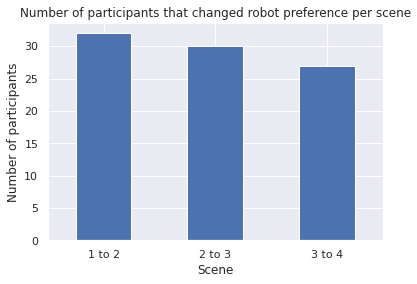

In [0]:
# Barplot changes per scene

mind_changes = mind_changes.rename(columns = {"1->2": "1 to 2", "2->3": "2 to 3", "3->4":"3 to 4"})
sums = mind_changes.iloc[:, :3].sum(axis=0)
ax = sums.plot.bar(rot=0)
# ax.set_xlim(right=45)
ax.set_ylabel("Number of participants")
ax.set_xlabel("Scene")
ax.set_title("Number of participants that changed robot preference per scene")

Text(0.5, 1.0, 'Number of participants that changed robot a certain amount of times')

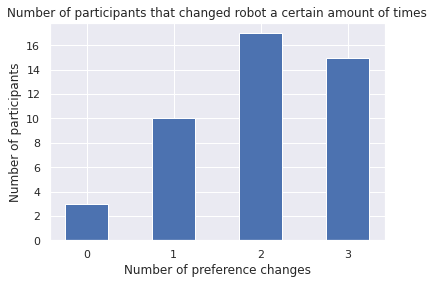

In [0]:
# Histogram amount of changes per participant
ax = mind_changes["number"].plot.hist(bins=[0, 1, 2, 3, 4], align = "left", rwidth=0.5)
ax.set_xticks([0, 1, 2, 3])
ax.set_xlabel("Number of preference changes")
ax.set_ylabel("Number of participants")
ax.set_title("Number of participants that changed robot a certain amount of times")

In [0]:
# Creating list of alternating participants
rand_part = []

for i in range(c12.shape[0]):
  if c12[i] == True and c23[i] == True and c34[i] == True:
    rand_part.append(pf["id"][i])

# Coherence between trust from questionnaire and cube allocation

## Excluding alternating participants

In [0]:
# New dataset excluding participants that behaved randomly rand_part_s changed twice consecutive, rand_part trice
no_rnd_pf = pf
no_rnd_ownQ = ownQ
for i in rand_part:
  no_rnd_pf = no_rnd_pf.drop(no_rnd_pf[no_rnd_pf["id"] == i].index)
  no_rnd_ownQ = no_rnd_ownQ.drop(no_rnd_ownQ[no_rnd_ownQ["id"] == i].index)

print("Alternating participants: " + str(rand_part))

no_rnd_pf = no_rnd_pf.reset_index()
no_rnd_ownQ = no_rnd_ownQ.reset_index()

print(no_rnd_pf.shape[0])
print(no_rnd_ownQ.shape[0])

if not (no_rnd_pf.shape[0] == no_rnd_ownQ.shape[0]):
  raise NameError("Data frame sizes do not correspond")

Alternating participants: [2, 5, 8, 9, 10, 13, 21, 24, 26, 37, 40, 43, 44, 46, 48]
30
30


## Correlation trust and metric


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Spearman correlation metric and relative trust SpearmanrResult(correlation=0.40225542925799507, pvalue=0.03383226389921356)


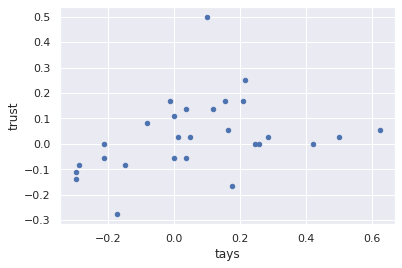

In [0]:
rttsn = pd.DataFrame(columns=("trust", "tays", "id", "tc"))
upt = pd.DataFrame({"Scene 1", "Scene 2", "Scene 3", "Scene 4"})

for i in range (0,no_rnd_pf.shape[0]):
  tays = (no_rnd_pf["tays1"][i] + no_rnd_pf["tays3"][i] + no_rnd_pf["tays4"][i]+ no_rnd_pf["tays2"][i])/4
  rt = no_rnd_ownQ['B_trust'][i] - no_rnd_ownQ['A_trust'][i]
  cubes = no_rnd_pf["total_cube"][i]
  pn = no_rnd_pf["id"][i]
  if cubes >= 12:
    upt = upt.append({"Scene 1": no_rnd_pf["tays1"][i], "Scene 2": no_rnd_pf["tays2"][i], "Scene 3" : no_rnd_pf["tays3"][i], "Scene 4": no_rnd_pf["tays4"][i]}, ignore_index=True)
    rttsn = rttsn.append({"trust": rt, "tays": tays, "id": pn,"tc": cubes}, ignore_index=True)

rttsn.plot.scatter("tays", "trust")

print("Spearman correlation metric and relative trust", stats.spearmanr(rttsn['tays'], rttsn['trust']))

(-0.7, 0.7)

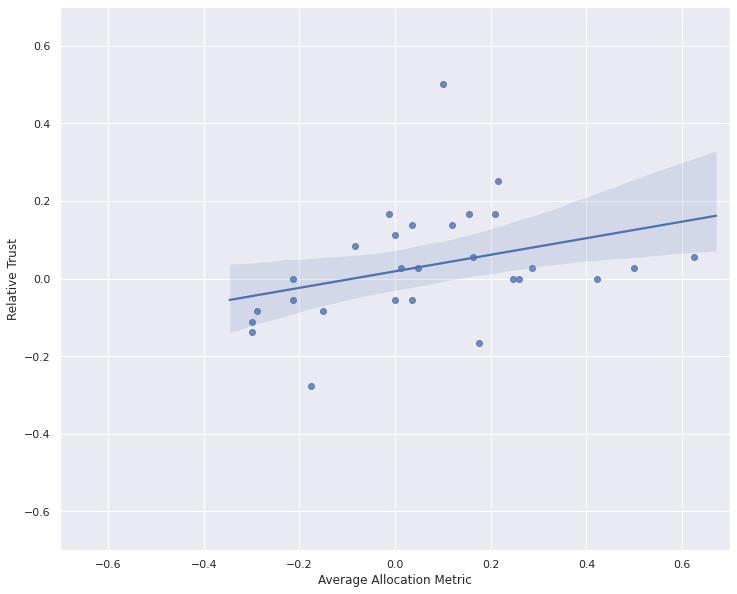

In [0]:
# Regression plot for correlation

ax = sns.regplot("tays", "trust", data=rttsn, truncate=False)
ax.figure.set_size_inches(12, 10)
# ax.set_title("Correlation of relative trust and allocation metric")
ax.set_xlabel("Average Allocation Metric")
ax.set_ylabel("Relative Trust")
ax.set_xlim(left=-0.7, right=0.7)
ax.set_ylim(bottom=-0.7, top=0.7)
# ax.text(x=-1, y=-1, s="Spearman correlation of 0.40 with p-value 0.034")